# 1. Data & Library load

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 44 kB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

from sklearn.preprocessing import *
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import *

In [ ]:
path = '/content/gdrive/MyDrive/kaggle/'
import os
os.listdir(path)

In [ ]:
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
submission = pd.read_csv(path + 'sample_submission.csv')

In [ ]:
train.drop('id',axis=1, inplace=True)
test.drop('id',axis=1, inplace=True)

# 2. Feature engineering

In [ ]:
encoder = LabelEncoder()
train_label = train.copy()
test_label = test.copy()

for i in range(10):
    train_label.iloc[:,i] = encoder.fit_transform(train.iloc[:,i])
    test_label.iloc[:,i] = encoder.transform(test.iloc[:,i])

In [ ]:
X = train_label.drop('target',axis=1)
y = train_label.target

# 3. Standard Modeling

In [ ]:
li_reg = LinearRegression()
gb_reg = GradientBoostingRegressor(n_estimators=1000, max_depth=3)
xgb_params = {
    'n_estimators': 5000,
    'learning_rate': 0.12,
    'subsample': 0.96,
    'colsample_bytree': 0.12,
    'max_depth': 2,
    'booster': 'gbtree', 
    'reg_lambda': 65.1,
    'reg_alpha': 15.9,
    'random_state':40
}
xgb_reg = XGBRegressor(tree_method='gpu_hist', gpu_id=0, predictor="gpu_predictor", **xgb_params )
cgb_reg=CatBoostRegressor(n_estimators=5000, learning_rate=0.01)
lgb_reg = LGBMRegressor(learning_rate = 0.003049106861273527,
                                n_estimators = 16000,
                                num_leaves = 51,
                                max_depth = 65,
                                n_jobs = -1,
                                random_state = 0,
                                cat_smooth = 93.60968300634175,
                                min_child_samples = 177,
                                colsample_bytree = 0.2185112060137363,
                                max_bin = 537,
                                reg_alpha = 9.03513073170552,
                                reg_lambda = 0.024555737897445917,
                           min_data_per_group = 117,
                            bagging_freq = 1,
                       bagging_fraction = 0.6709049555262285,
                 cat_l2 = 7.5586732660804445)

In [ ]:
li_reg.fit(X, y)
gb_reg.fit(X , y)
xgb_reg.fit(X, y)
cgb_reg.fit(X, y)
lgb_reg.fit(X, y)

In [ ]:
li_pred = li_reg.predict(test_label)
gb_pred = gb_reg.predict(test_label)
xgb_pred = xgb_reg.predict(test_label)
cgb_pred = cgb_reg.predict(test_label)
lgb_pred = lgb_reg.predict(test_label)

In [ ]:
submission.iloc[:,1]=li_pred
submission.to_csv(path + 'submission_li.csv',index=False)

In [ ]:
submission.iloc[:,1]=gb_pred
submission.to_csv(path + 'submission_gb.csv',index=False)

PB_score : 0.72066

In [ ]:
submission.iloc[:,1]=xgb_pred
submission.to_csv(path + 'submission_xg.csv',index=False)

PB_score : 0.71916

In [ ]:
submission.iloc[:,1]=cgb_pred
submission.to_csv(path + 'submission_cgb.csv',index=False)

PB_score : 0.72264

In [ ]:
submission.iloc[:,1]=lgb_pred
submission.to_csv(path + 'submission_lgb.csv',index=False)

PB_score : 0.71866

# 4. Blending

Ensemble Learning refers to the use of ML algorithms jointly to solve classification and/or regression problems mainly. These algorithms can be the same type (homogeneous Ensemble Learning) or different types (heterogeneous Ensemble Learning). Ensemble Learning performs a strategic combination of various experts or ML models in order to improve the effectiveness obtained using a single weak model.

Blending is a technique derived from Stacking Generalization. The only difference is that in Blending, the k-fold cross validation technique is not used to generate the training data of the meta-model. Blending implements “one-holdout set”, that is, a small portion of the training data (validation) to make predictions which will be “stacked” to form the training data of the meta-model. Also, predictions are made from the test data to form the meta-model test data.

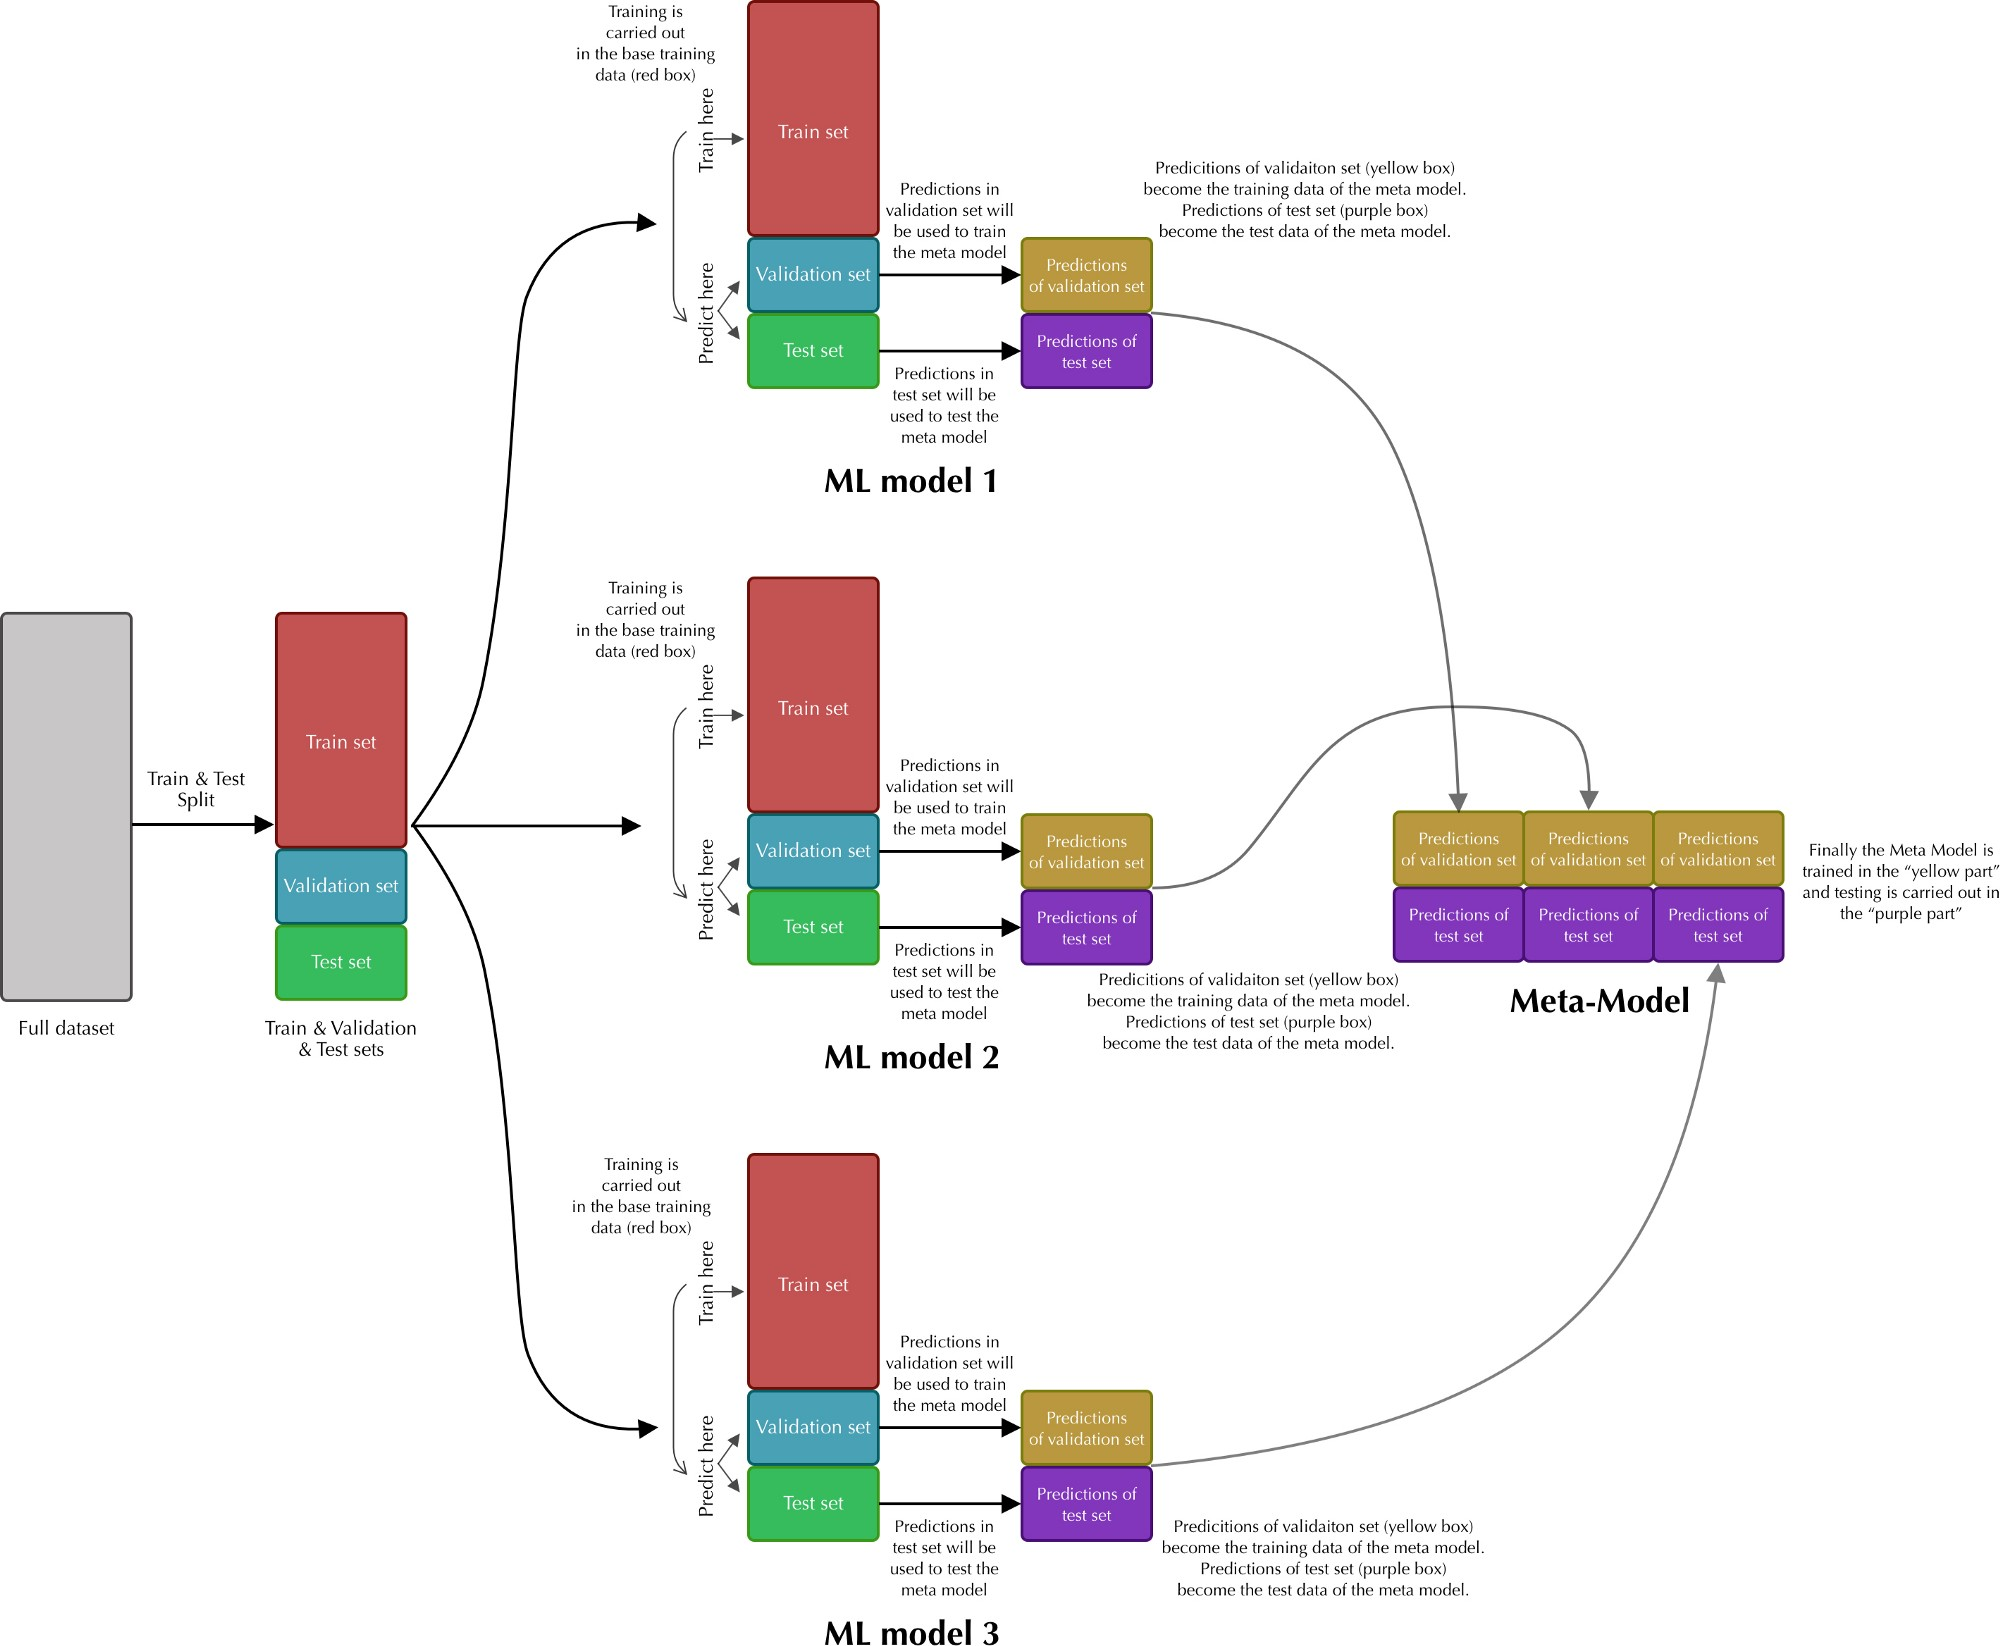

In [ ]:
blend_a=(li_pred+gb_pred+xgb_pred+cgb_pred+lgb_pred)/5
blend_b=(li_pred*gb_pred*xgb_pred*cgb_pred*lgb_pred)**(1/5)
blend_c=(gb_pred+xgb_pred+cgb_pred+lgb_pred)/4
blend_d=(gb_pred*xgb_pred*cgb_pred*lgb_pred)**(1/4)
blend_e=(xgb_pred+cgb_pred+lgb_pred)/3
blend_f=(xgb_pred*cgb_pred*lgb_pred)**(1/3)

When blending, values can be applied with weights, or indicators such as arithmetic and geometric means can be used.

In [ ]:
submission.iloc[:,1]=blend_a
submission.to_csv(path + 'submission_blend_a.csv',index=False)

PB_score : 0.72090

In [ ]:
submission.iloc[:,1]=blend_b
submission.to_csv(path + 'submission_blend_b.csv',index=False)

PB_score : 0.72089

In [ ]:
submission.iloc[:,1]=blend_c
submission.to_csv(path + 'submission_blend_c.csv',index=False)

PB_score : 0.71923

In [ ]:
submission.iloc[:,1]=blend_d
submission.to_csv(path + 'submission_blend_d.csv',index=False)

PB_score : 0.71923

In [ ]:
submission.iloc[:,1]=blend_e
submission.to_csv(path + 'submission_blend_e.csv',index=False)

PB_score : 0.71913

In [ ]:
submission.iloc[:,1]=blend_f
submission.to_csv(path + 'submission_blend_f.csv',index=False)

PB_score : 0.71923

# 5. Standard Stacking

- Stacking
Better known as Stacking Generalization, it is a method introduced by David H. Wolpert in 1992 where the key is to reduce the generalization error of different generalizers (i.e. ML models). The general idea of the Stacking Generalization method is the generation of a Meta-Model. Such a Meta-Model is made up of the predictions of a set of ML base models (i.e. weak learners) through the k-fold cross validation technique. Finally, the Meta-Model is trained with an additional ML model (which is commonly known as the “final estimator” or “final learner”).

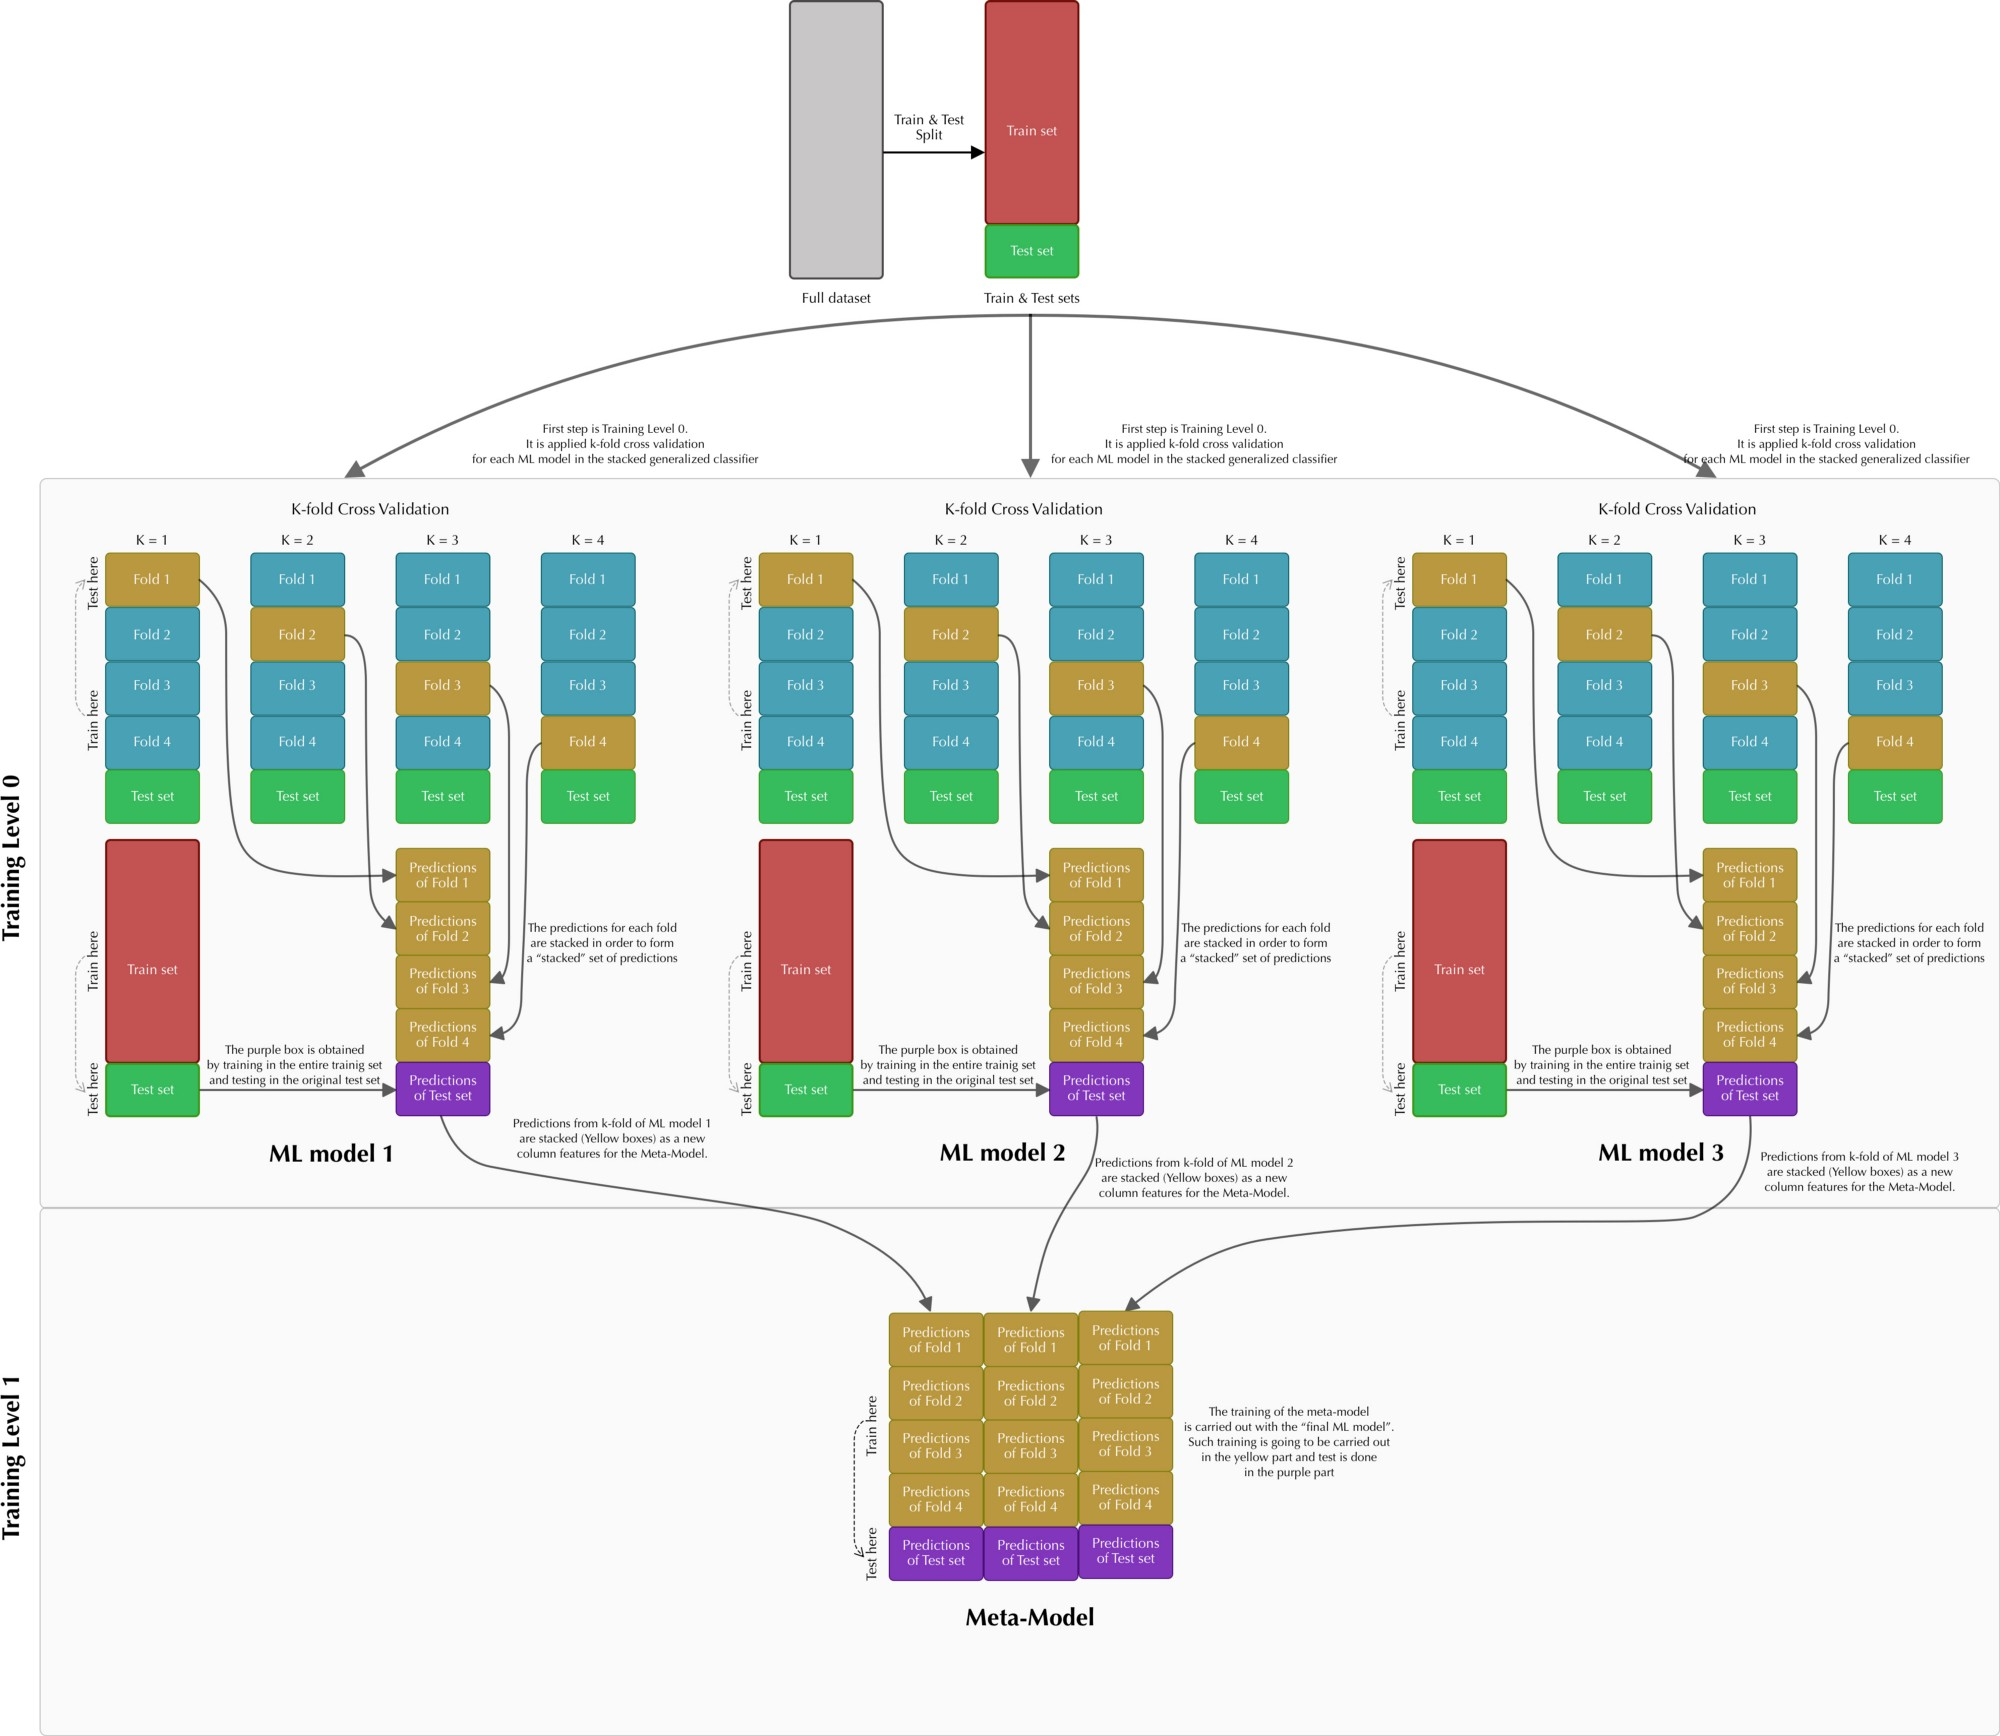

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
li_reg.fit(X_train, y_train)
gb_reg.fit(X_train , y_train)
xgb_reg.fit(X_train, y_train)
cgb_reg.fit(X_train, y_train)

li_pred = li_reg.predict(X_val)
gb_pred = gb_reg.predict(X_val)
xgb_pred = xgb_reg.predict(X_val)
cgb_pred = cgb_reg.predict(X_val)

pred = np.array([li_pred, gb_pred, xgb_pred, cgb_pred])
pred = np.transpose(pred)

lgb_pred.fit(pred, y_val)

In [ ]:
li_reg.fit(X, y)
gb_reg.fit(X , y)
xgb_reg.fit(X, y)
cgb_reg.fit(X, y)

li_pred = li_reg.predict(test_label)
gb_pred = gb_reg.predict(test_label)
xgb_pred = xgb_reg.predict(test_label)
cgb_pred = cgb_reg.predict(test_label)

pred = np.array([li_pred, gb_pred, xgb_pred, cgb_pred])
pred = np.transpose(pred)

final = lgb_pred.predict(pred)

In [ ]:
submission.iloc[:,1]=final
submission.to_csv(path + 'submission_normal_stacking.csv',index=False)

PB_score : 0.72357

# 5. Stacking with CV

The previous stacking technology utilized only one segmented train, validation set. Since this is a problem with overfitting, we will use CV to apply stacking again.

In [ ]:
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # KFold
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    # Initialize the numpy array for future return of learning data to be used by the meta model
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model start ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # Extract the fold dataset from the entered learning data that the underlying model will learn/predict
        print('\t fold set: ',folder_counter,' start ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        # Performing learning of the based model with learning data that has been re-created within the fold set.
        model.fit(X_tr , y_tr)       
        # Model prediction based on re-created verification data from within the fold set and then storing data.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        # Store the data after predicting the entered original test data in the learned underlying model within the fold set.
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # Generate test data by averaging the predicted data from within the fold set 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    # train_fold_pred is the learning data used by the final meta model; test_pred_mean is the test data
    return train_fold_pred , test_pred_mean

In [ ]:
# get_stacking_base_datasets( ) uses overflowing ndarrays as a factor, thus converting DataFrame to overflowing.
# This procedure is not required in classification, but this array conversion is essential in regression
X_train_n = X.values
X_test_n = test_label.values
y_train_n = y.values


# Return data for learning/test generated by each Base model.
li_train, li_test = get_stacking_base_datasets(li_reg, X_train_n, y_train_n, X_test_n, 5)
gb_train, gb_test = get_stacking_base_datasets(gb_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
cgb_train, cgb_test = get_stacking_base_datasets(cgb_reg, X_train_n, y_train_n, X_test_n, 5)

In [ ]:
# Combines data sets for learning and testing returned by individual models in stacking form.
Stack_final_X_train = np.concatenate((li_train, gb_train, xgb_train, cgb_train), axis=1)
Stack_final_X_test = np.concatenate((li_test, gb_test, xgb_test, cgb_test), axis=1)


# Predict with newly created learning and testing data and RMSE measurements based on forecasts from the underlying model.
lgb_reg.fit(Stack_final_X_train, y)
final = lgb_reg.predict(Stack_final_X_test)

In [ ]:
submission.iloc[:,1]=final
submission.to_csv(path + 'submission_cv_stacking.csv',index=False)

PB_score : 0.72075

# Conclusion
We looked into and applied the typical method of ensemble, stacking and mixing technologies. Mixing is a technique derived from stacking.
Ultimately, technologies to reduce ML model errors and increase efficiency must be highly diverse and perform well in the underlying model to expect high performance in these advanced models. These methods only increase a little bit of performance. It is up to each developer to choose the technology that best suits their problems, considering several factors, such as the amount of data, available derivatives, type of learning to perform, optimal parameter settings, and amount of computers.

- References

    - https://towardsdatascience.com/ensemble-learning-stacking-blending-voting-b37737c4f483

    - https://github.com/wikibook/ml-definitive-guide/blob/master/5%EC%9E%A5/5.10%20Regression%20%EC%8B%A4%EC%8A%B5%20-%20Kaggle%20House%20Price.ipynb